# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [118]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from ratelimiter import RateLimiter
import json
#from config import api_key

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [119]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

#cities_df = pd.DataFrame({"city": cities})
#cities_df.head()

664

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [ ]:
#Define url path for the api
url = "http://api.openweathermap.org/data/2.5/weather?"


#rate_limiter = RateLimiter(max_calls=50, period=60)

#print(query_url)
#response = requests.get(query_url)
#response_json = response.json()
#print(json.dumps(response_json, indent=4, sort_keys=True))

#The first requirement is to create a series of scatter plots to showcase the following relationships:
#Temperature (F) vs. Latitude
#Humidity (%) vs. Latitude
#Cloudiness (%) vs. Latitude
#Wind Speed (mph) vs. Latitude

cities_df = pd.DataFrame({"city": cities})

#set up additional columns to hold information
cities_df['latitude'] = ""
cities_df['longitude'] = ""
cities_df["temperature"] = ""
cities_df['humidity'] = ""
cities_df['cloudiness'] = ""
cities_df['windspeed'] = ""

#cities_df.head()

#loop through the list of cities and perform a request for data on each
#iterrows to iterate through pandas dataframe
for index, row in cities_df.iterrows():
    
    #get city from df
    city = row["city"]
    
    #assemble url and make API request
    print(f"Retrieving Results for Index {index}: {city}")
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    #print(query_url)
    #extract results
    #results = response['results']
    
    try:
        cities_df.loc[index, 'latitude'] = response['coord']['lat']
        cities_df.loc[index, 'longitude'] = response['coord']['lon']
        cities_df.loc[index, 'temperature'] = response['main']['temp_max']
        cities_df.loc[index, 'humidity'] = response['main']['humidity']
        cities_df.loc[index, 'cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'windspeed'] = response['wind']['speed']
    except:
        print("Missing field.. skipping")
        
print("---------------")


Retrieving Results for Index 0: butaritari
Retrieving Results for Index 1: sola
Retrieving Results for Index 2: yellowknife
Retrieving Results for Index 3: qaanaaq
Retrieving Results for Index 4: hilo
Retrieving Results for Index 5: gueret
Retrieving Results for Index 6: upernavik
Retrieving Results for Index 7: ushuaia
Retrieving Results for Index 8: tiksi
Retrieving Results for Index 9: kudahuvadhoo
Retrieving Results for Index 10: punta arenas
Retrieving Results for Index 11: cape town
Retrieving Results for Index 12: hobart
Retrieving Results for Index 13: clyde river
Retrieving Results for Index 14: rikitea
Retrieving Results for Index 15: livingston
Retrieving Results for Index 16: plettenberg bay
Retrieving Results for Index 17: pokhara
Retrieving Results for Index 18: bluff
Retrieving Results for Index 19: tasiilaq
Retrieving Results for Index 20: dinard
Retrieving Results for Index 21: iqaluit
Retrieving Results for Index 22: vaini
Retrieving Results for Index 23: albany
Retri

Retrieving Results for Index 182: moron
Retrieving Results for Index 183: northam
Retrieving Results for Index 184: kuryk
Retrieving Results for Index 185: college
Retrieving Results for Index 186: ust-kuyga
Retrieving Results for Index 187: kloulklubed
Retrieving Results for Index 188: dikson
Retrieving Results for Index 189: itoman
Retrieving Results for Index 190: bitam
Retrieving Results for Index 191: iralaya
Retrieving Results for Index 192: mehamn
Retrieving Results for Index 193: ribeira grande
Retrieving Results for Index 194: maldonado
Retrieving Results for Index 195: waipawa
Retrieving Results for Index 196: kavieng
Retrieving Results for Index 197: fernley
Retrieving Results for Index 198: nanortalik
Retrieving Results for Index 199: cidreira
Retrieving Results for Index 200: kodiak
Retrieving Results for Index 201: rudbar
Retrieving Results for Index 202: cuamba
Retrieving Results for Index 203: roma
Retrieving Results for Index 204: mar del plata
Retrieving Results for I

Retrieving Results for Index 365: melendugno
Retrieving Results for Index 366: orlik
Retrieving Results for Index 367: vallenar
Retrieving Results for Index 368: maumere
Retrieving Results for Index 369: urumqi
Retrieving Results for Index 370: sambava
Retrieving Results for Index 371: kortkeros
Retrieving Results for Index 372: tianpeng
Retrieving Results for Index 373: slave lake
Retrieving Results for Index 374: nassau
Retrieving Results for Index 375: meulaboh
Retrieving Results for Index 376: kirksville
Retrieving Results for Index 377: bumbuna
Retrieving Results for Index 378: nola
Retrieving Results for Index 379: luan
Retrieving Results for Index 380: mahibadhoo
Retrieving Results for Index 381: hambantota
Retrieving Results for Index 382: byron bay
Retrieving Results for Index 383: murashi
Retrieving Results for Index 384: pirogovo
Retrieving Results for Index 385: mikhaylovsk
Retrieving Results for Index 386: saldanha
Retrieving Results for Index 387: songjianghe
Retrieving R

In [ ]:
#{"coord":{"lon":169.8464,"lat":-46.2817},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02d"}],"base":"stations","main":{"temp":293.11,"feels_like":292.86,"temp_min":293.11,"temp_max":293.11,"pressure":1006,"humidity":65,"sea_level":1006,"grnd_level":1005},"visibility":10000,"wind":{"speed":2.92,"deg":71,"gust":5.41},"clouds":{"all":24},"dt":1645153763,"sys":{"type":2,"id":2000217,"country":"NZ","sunrise":1645120749,"sunset":1645170619},"timezone":46800,"id":2208248,"name":"Kaitangata","cod":200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [74]:
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         625 non-null    object
 1   latitude     625 non-null    object
 2   temperature  625 non-null    object
 3   humidity     625 non-null    object
 4   cloudiness   625 non-null    object
 5   windspeed    625 non-null    object
dtypes: object(6)
memory usage: 29.4+ KB


In [68]:
#cities_df.to_csv()

',city,latitude,temperature,humidity,cloudiness,windspeed\r\n0,ribeira grande,38.5167,283.72,65,98,11.12\r\n1,kaitangata,-46.2817,293.11,65,24,2.92\r\n2,taolanaro,,,,,\r\n3,jamestown,42.097,273.72,72,100,4.12\r\n4,mecca,21.4267,293.36,73,0,0.36\r\n5,atuona,-9.8,299.18,74,9,8.52\r\n6,touros,-5.1989,299.65,77,12,3.14\r\n7,kyshtovka,56.555,263.35,93,100,4.47\r\n8,hermanus,-34.4187,291.43,81,6,6.52\r\n9,lebu,-37.6167,287.01,79,0,7.29\r\n10,genhe,50.7833,259.27,72,100,1.57\r\n11,comodoro rivadavia,-45.8667,291.07,36,0,2.57\r\n12,punta arenas,-53.15,284.21,82,75,3.09\r\n13,cleethorpes,53.5605,278.7,92,100,7.62\r\n14,balkanabat,39.5108,278.31,41,0,2.93\r\n15,linden,6,296.23,97,12,1.04\r\n16,ilulissat,69.2167,257.16,78,100,2.06\r\n17,dingle,10.9995,302.67,62,79,6.03\r\n18,severo-kurilsk,50.6789,272.17,90,100,7\r\n19,bengkulu,-3.8004,300.05,70,100,0.19\r\n20,riyadh,24.6877,285.23,34,17,5.16\r\n21,puerto ayora,-0.7393,297.2,89,98,2.8\r\n22,segezha,63.7415,273.67,98,100,6.68\r\n23,busselton,-33.6

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

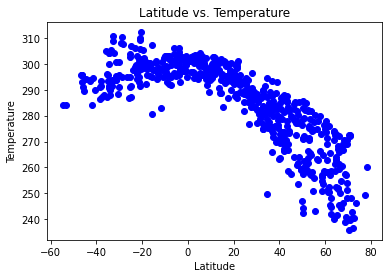

In [71]:
plt.scatter(pd.to_numeric(cities_df["latitude"]).astype(float), pd.to_numeric(cities_df["temperature"]).astype(float), facecolors="blue")
plt.title(f"Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature") 
plt.show()

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Latitude vs humidity)')

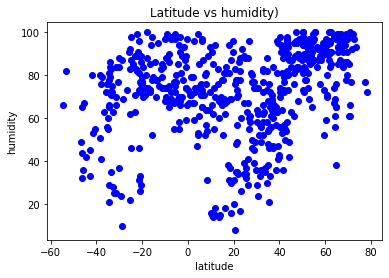

In [80]:
plt.scatter(pd.to_numeric(cities_df["latitude"]).astype(float), pd.to_numeric(cities_df["humidity"]).astype(float), facecolors="blue")
plt.xlabel("latitude")
plt.ylabel("humidity")
plt.title(f"Latitude vs humidity)")
plt.show()

## Latitude vs. Cloudiness Plot

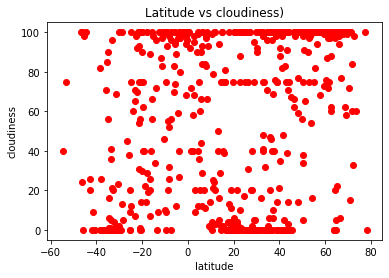

In [83]:
plt.scatter(pd.to_numeric(cities_df["latitude"]).astype(float), pd.to_numeric(cities_df["cloudiness"]).astype(float), color="red")
plt.xlabel("latitude")
plt.ylabel("cloudiness")
plt.title(f"Latitude vs cloudiness)")
plt.show()

## Latitude vs. Wind Speed Plot

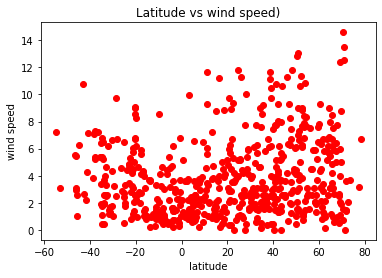

In [84]:
plt.scatter(pd.to_numeric(cities_df["latitude"]).astype(float), pd.to_numeric(cities_df["windspeed"]).astype(float), color="red")
plt.xlabel("latitude")
plt.ylabel("wind speed")
plt.title(f"Latitude vs wind speed)")
plt.show()

## Linear Regression

In [85]:
#create dataframes for northern (lat > 0) and southern hemisphere (lat < 0)
northern_df = cities_df.loc[pd.to_numeric(cities_df["latitude"]).astype(float) > 0, :]
northern_df.head()

,city,latitude,temperature,humidity,cloudiness,windspeed
0,ribeira grande,38.5167,283.72,65,98,11.12
3,jamestown,42.097,273.72,72,100,4.12
4,mecca,21.4267,293.36,73,0,0.36
7,kyshtovka,56.555,263.35,93,100,4.47
10,genhe,50.7833,259.27,72,100,1.57


In [86]:
southern_df = cities_df.loc[pd.to_numeric(cities_df["latitude"]).astype(float) < 0, :]
southern_df.head()

,city,latitude,temperature,humidity,cloudiness,windspeed
1,kaitangata,-46.2817,293.11,65,24,2.92
5,atuona,-9.8,299.18,74,9,8.52
6,touros,-5.1989,299.65,77,12,3.14
8,hermanus,-34.4187,291.43,81,6,6.52
9,lebu,-37.6167,287.01,79,0,7.29


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8634194776033257


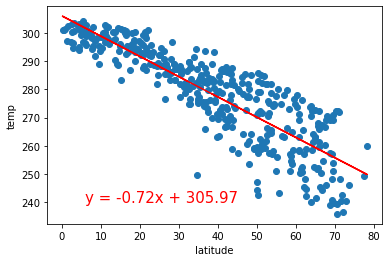

In [102]:
x_values = pd.to_numeric(northern_df['latitude']).astype(float)
y_values = pd.to_numeric(northern_df['temperature']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,240),fontsize=15,color="red") ##<<- not appearing??
plt.xlabel('latitude')
plt.ylabel('temp')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.34658109403346266


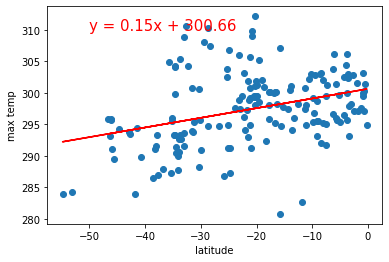

In [101]:
x_values = pd.to_numeric(southern_df['latitude']).astype(float)
y_values = pd.to_numeric(southern_df['temperature']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,310),fontsize=15,color="red") ##<<- not appearing??
plt.xlabel('latitude')
plt.ylabel('max temp')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.44631730981219037


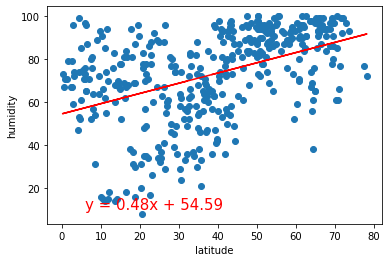

In [92]:
x_values = pd.to_numeric(northern_df['latitude']).astype(float)
y_values = pd.to_numeric(northern_df['humidity']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('humidity')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.4082936500622412


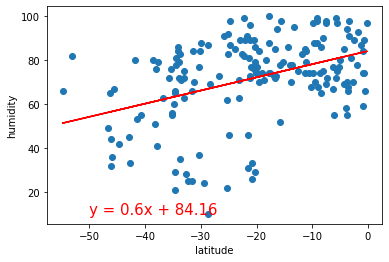

In [98]:
x_values = pd.to_numeric(southern_df['latitude']).astype(float)
y_values = pd.to_numeric(southern_df['humidity']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('humidity')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3558788203649687


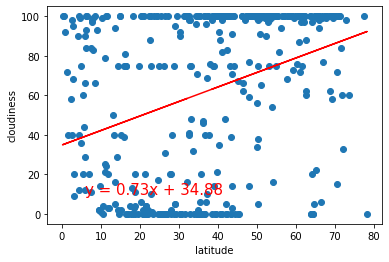

In [94]:
x_values = pd.to_numeric(northern_df['latitude']).astype(float)
y_values = pd.to_numeric(northern_df['cloudiness']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.4222382574393889


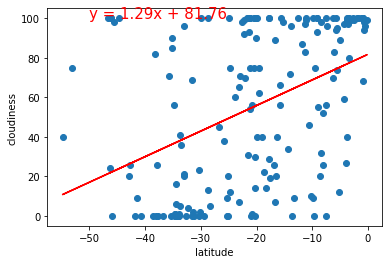

In [103]:
x_values = pd.to_numeric(southern_df['latitude']).astype(float)
y_values = pd.to_numeric(southern_df['cloudiness']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,100),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.20343942648924965


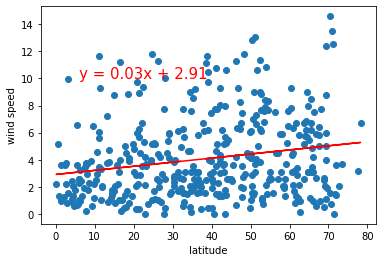

In [104]:
x_values = pd.to_numeric(northern_df['latitude']).astype(float)
y_values = pd.to_numeric(northern_df['windspeed']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('wind speed')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3385453388404835


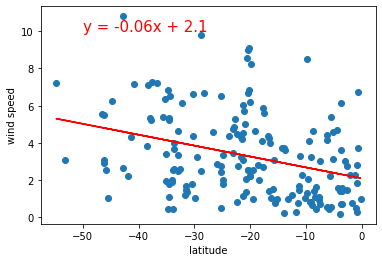

In [106]:
x_values = pd.to_numeric(southern_df['latitude']).astype(float)
y_values = pd.to_numeric(southern_df['windspeed']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('wind speed')
print(f"The r-squared is: {rvalue}")
plt.show()

In [117]:
cities_df.to_csv("../output_data/weather.csv", index=False, header=True)